In [8]:
import pandas as pd
from sklearn import linear_model

beer = pd.read_csv('~/Downloads/lager_antioxidant_reg.csv')
display(beer.head())
display(beer.shape)

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


(40, 8)

In [36]:
x_columns = [col for col in beer.columns.values if col != "tpc" and col != "beer" ]

# Features
X = beer[x_columns][["ma","dsa"]]
print(X)

# Groundtruth
y = beer["tpc"]


       ma   dsa
0   13.37  0.66
1   10.96  0.63
2    9.22  0.62
3    9.65  0.90
4   11.72  0.64
5    9.33  0.62
6    8.27  0.58
7   12.06  0.47
8    9.06  0.59
9   10.71  0.72
10   9.14  0.53
11  13.70  0.32
12  11.70  0.42
13  10.71  0.64
14   1.64  0.42
15  12.39  0.77
16   4.29  0.30
17  11.04  0.70
18   9.56  0.51
19  13.08  0.53
20   9.91  0.56
21  11.50  0.56
22  10.08  0.53
23  12.51  0.49
24  14.13  0.58
25  12.92  0.68
26   8.29  0.56
27  10.62  0.36
28   3.77  0.24
29  12.50  0.97
30   6.66  0.63
31   7.57  0.64
32  10.80  0.48
33  11.03  0.96
34  10.32  0.63
35  12.69  0.86
36   9.81  0.58
37   6.83  0.80
38  13.71  0.75
39  14.83  0.91


In [37]:
from sklearn import linear_model
import numpy as np

rgs = linear_model.LinearRegression()

#create the model
rgs.fit(X, y)
#now we print the model coefficients
display(rgs.intercept_, rgs.coef_)

# En 2D
# y = mx + C
# En 6D ->Eq recta en 6 dimensiones (hiperplano)
# q = a*x+b*y+c*z+d*t+i*p+j*m + C
# COEF: [a,b,c,d,i,j]
# INTERCEPT: C

features = [ 13.37, 0.66, 0.81, 3.81, 0.45, 10.65]
v = np.sum( features * rgs.coef_) + rgs.intercept_
print(v)

vp = rgs.predict([features])
print(vp)

27.289230973437725

array([  2.74414764, 185.15827444])

ValueError: operands could not be broadcast together with shapes (6,) (2,) 

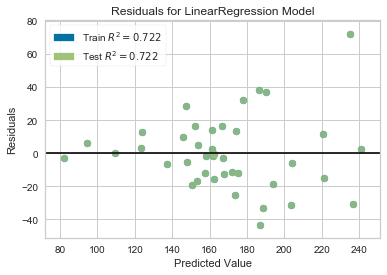

In [38]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(rgs, hist=False)
visualizer.fit(X, y)  # Fit the training data to the model
visualizer.score(X, y) 
visualizer.poof() 

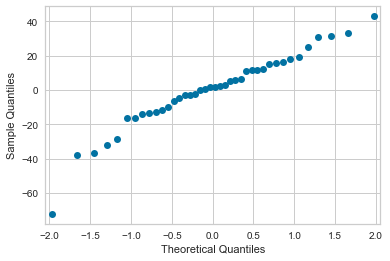

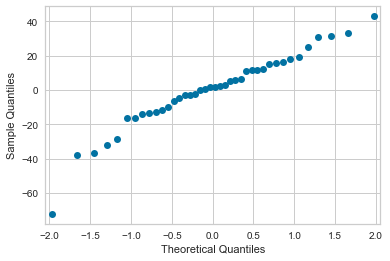

In [39]:
import statsmodels.api as sm

predictions = rgs.predict(X)
residuals = y - predictions
sm.qqplot(residuals)